### Lecture et préparation des données

Import des fichiers dans google colab

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving F1_2015_2016.csv to F1_2015_2016.csv
Saving F1_2016_2017.csv to F1_2016_2017.csv
Saving F1_2017_2018.csv to F1_2017_2018.csv
Saving F1_2018_2019.csv to F1_2018_2019.csv
Saving F1_2019_2020.csv to F1_2019_2020.csv
Saving F1_2020_2021.csv to F1_2020_2021.csv
Saving F1_2021_2022.csv to F1_2021_2022.csv


Import des librairies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure
from bokeh.io import  push_notebook,output_notebook, show
from bokeh.models.widgets import Panel, Tabs
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
import plotly.express as px
import statsmodels.api
output_notebook()  # pour un affichage en ligne

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Lecture des fichiers de données des saisons de football de Ligue 1 de 2015 à 2021 (1 fichier csv par saison)

In [ ]:
# Le format date est importé au format européen
df_2015 = pd.read_csv('F1_2015_2016.csv', parse_dates=['Date'],dayfirst=True)
df_2016 = pd.read_csv('F1_2016_2017.csv', parse_dates=['Date'],dayfirst=True)
df_2017 = pd.read_csv('F1_2017_2018.csv', parse_dates=['Date'],dayfirst=True) 
df_2018 = pd.read_csv('F1_2018_2019.csv', parse_dates=['Date'],dayfirst=True) 
df_2019 = pd.read_csv('F1_2019_2020.csv', parse_dates=['Date'],dayfirst=True) 
df_2020 = pd.read_csv('F1_2020_2021.csv', parse_dates=['Date'],dayfirst=True) 
df_2021 = pd.read_csv('F1_2021_2022.csv', parse_dates=['Date'],dayfirst=True) 

In [ ]:
# Création d'une colonne Saison pour chaque dataframe
df_2015['Saison'] = '2015'
df_2016['Saison'] = '2016'
df_2017['Saison'] = '2017'
df_2018['Saison'] = '2018'
df_2019['Saison'] = '2019'
df_2020['Saison'] = '2020'
df_2021['Saison'] = '2021'

Taille de chaque dataframe

In [ ]:
print("Le dataframe pour la saison 2015 contient", df_2015.shape[0], 'lignes et', df_2015.shape[1], 'colonnes.')
print("Le dataframe pour la saison 2016 contient", df_2016.shape[0], 'lignes et', df_2016.shape[1], 'colonnes.')
print("Le dataframe pour la saison 2017 contient", df_2017.shape[0], 'lignes et', df_2017.shape[1], 'colonnes.')
print("Le dataframe pour la saison 2018 contient", df_2018.shape[0], 'lignes et', df_2018.shape[1], 'colonnes.')
print("Le dataframe pour la saison 2019 contient", df_2019.shape[0], 'lignes et', df_2019.shape[1], 'colonnes.')
print("Le dataframe pour la saison 2020 contient", df_2020.shape[0], 'lignes et', df_2020.shape[1], 'colonnes.')
print("Le dataframe pour la saison 2021 contient", df_2021.shape[0], 'lignes et', df_2021.shape[1], 'colonnes.')

Le dataframe pour la saison 2015 contient 381 lignes et 65 colonnes.
Le dataframe pour la saison 2016 contient 380 lignes et 65 colonnes.
Le dataframe pour la saison 2017 contient 380 lignes et 65 colonnes.
Le dataframe pour la saison 2018 contient 380 lignes et 62 colonnes.
Le dataframe pour la saison 2019 contient 279 lignes et 106 colonnes.
Le dataframe pour la saison 2020 contient 380 lignes et 106 colonnes.
Le dataframe pour la saison 2021 contient 220 lignes et 106 colonnes.


Tous les dataframes devraient contenir 20 * 19 = 380 lignes.
La saison 2021 est en cours donc ne contient qu'une partie de la saison.
La saison 2019 a été stoppée en cours à cause du COVID.
Nous allons étudier pourquoi la saison 2015 contient 1 ligne de trop.

In [ ]:
# Cette fonction permet de déterminer les variables avec des valeurs manquantes
def valeur_manquante(df):
    flag=0
    for col in df.columns:
            if df[col].isna().sum() > 0:
                flag=1
                print(f'"{col}": {df[col].isna().sum()} valeur(s) manquante(s)')
    if flag==0:
        print("Le dataset ne contient plus de valeurs manquantes.")

valeur_manquante(df_2015)

"Div": 1 valeur(s) manquante(s)
"Date": 1 valeur(s) manquante(s)
"HomeTeam": 1 valeur(s) manquante(s)
"AwayTeam": 1 valeur(s) manquante(s)
"FTHG": 1 valeur(s) manquante(s)
"FTAG": 1 valeur(s) manquante(s)
"FTR": 1 valeur(s) manquante(s)
"HTHG": 1 valeur(s) manquante(s)
"HTAG": 1 valeur(s) manquante(s)
"HTR": 1 valeur(s) manquante(s)
"HS": 1 valeur(s) manquante(s)
"AS": 1 valeur(s) manquante(s)
"HST": 1 valeur(s) manquante(s)
"AST": 1 valeur(s) manquante(s)
"HF": 1 valeur(s) manquante(s)
"AF": 1 valeur(s) manquante(s)
"HC": 1 valeur(s) manquante(s)
"AC": 1 valeur(s) manquante(s)
"HY": 1 valeur(s) manquante(s)
"AY": 1 valeur(s) manquante(s)
"HR": 1 valeur(s) manquante(s)
"AR": 1 valeur(s) manquante(s)
"B365H": 2 valeur(s) manquante(s)
"B365D": 2 valeur(s) manquante(s)
"B365A": 2 valeur(s) manquante(s)
"BWH": 1 valeur(s) manquante(s)
"BWD": 1 valeur(s) manquante(s)
"BWA": 1 valeur(s) manquante(s)
"IWH": 1 valeur(s) manquante(s)
"IWD": 1 valeur(s) manquante(s)
"IWA": 1 valeur(s) manquante(

Une ligne ne contient que des valeurs manquantes. Nous allons la supprimer.

In [ ]:
df_2015=df_2015.dropna(subset = ['HomeTeam'], axis=0)
print("Le dataframe pour la saison 2015 contient", df_2015.shape[0], 'lignes et', df_2015.shape[1], 'colonnes.')
valeur_manquante(df_2015)

Le dataframe pour la saison 2015 contient 380 lignes et 65 colonnes.
"B365H": 1 valeur(s) manquante(s)
"B365D": 1 valeur(s) manquante(s)
"B365A": 1 valeur(s) manquante(s)
"LBH": 1 valeur(s) manquante(s)
"LBD": 1 valeur(s) manquante(s)
"LBA": 1 valeur(s) manquante(s)


Il y a bien maintenant le bon nombre de lignes pour les données de la saison 2015.
Il reste une ligne avec quelques valeurs manquantes sur les données de côte de certains bookmakers, nous les gèrerons plus tard.

Le nombre de colonnes de tous les dataframes n'est pas le même selon les années. Nous allons étudier les différences entre les différentes variables.

In [ ]:
# Pas de différences entre les variables du dataframe 2015 et celui de 2016, idem pour 2016/2017, 2019/2020 et 2020/2021
print(set(df_2015.columns) ^ set(df_2016.columns))
print(set(df_2016.columns) ^ set(df_2017.columns))
print(set(df_2019.columns) ^ set(df_2020.columns))
print(set(df_2020.columns) ^ set(df_2021.columns))

print("Les variables du dataframe 2017 qui ne sont pas dans celui de 2018 sont :",set(df_2017.columns) ^ set(df_2018.columns))
# 3 variables qui étaient présentes en 2017 ne le sont pas en 2018 ; ce sont des variables de côte de bookmaker
print("Les variables du dataframe 2019 qui ne sont pas dans celui de 2017 sont :",set(df_2017.columns) ^ set(df_2019.columns))
# 41 variables ont été ajoutées en 2019 par rapport à 2017 ; de nouveaux bookmakers ont été ajoutés dans ces fichiers

set()
set()
set()
set()
Les variables du dataframe 2017 qui ne sont pas dans celui de 2018 sont : {'LBD', 'LBA', 'LBH'}
Les variables du dataframe 2019 qui ne sont pas dans celui de 2017 sont : {'PCAHH', 'BbMxD', 'Time', 'MaxCD', 'AHCh', 'B365CH', 'BbMxA', 'B365>2.5', 'PAHA', 'B365CAHH', 'BbOU', 'AvgA', 'PAHH', 'MaxCA', 'B365CA', 'BbAH', 'AvgCAHA', 'Avg<2.5', 'BWCH', 'MaxC<2.5', 'AvgAHH', 'BbAvH', 'BbMxAHA', 'BbAHh', 'MaxC>2.5', 'LBA', 'BbAvAHH', 'BbMx>2.5', 'AvgD', 'AvgCD', 'AvgCA', 'MaxAHH', 'AvgC<2.5', 'BbMx<2.5', 'MaxCAHA', 'MaxH', 'Bb1X2', 'B365C>2.5', 'IWCD', 'VCCA', 'BWCD', 'BbAvAHA', 'LBD', 'BbAv<2.5', 'BbMxH', 'B365CAHA', 'B365AHA', 'AHh', 'B365<2.5', 'WHCA', 'PC>2.5', 'IWCA', 'MaxCAHH', 'MaxD', 'BbAvD', 'BbAvA', 'AvgCAHH', 'WHCH', 'Max>2.5', 'B365AHH', 'AvgAHA', 'Avg>2.5', 'IWCH', 'BbAv>2.5', 'VCCD', 'Max<2.5', 'PC<2.5', 'LBH', 'MaxCH', 'AvgCH', 'BbMxAHH', 'VCCH', 'AvgH', 'WHCD', 'MaxA', 'P<2.5', 'B365C<2.5', 'PCAHA', 'AvgC>2.5', 'MaxAHA', 'P>2.5', 'BWCA', 'B365CD'}


Concaténation de toutes les années : toutes les années peuvent être fusionnées même si elles n'ont pas toutes le même nombre de variables ; les variables différentes entre les années ne concernent que des données des côtes des bookmakers qui ne sont pas indispensables à la modélisation

In [ ]:
frames = (df_2015, df_2016, df_2017,df_2018,df_2019,df_2020,df_2021)
df = pd.concat(frames).reset_index(drop=True)

Extrait du dataframe

In [ ]:
df.sample(5)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,...,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
1450,F1,2019-04-12,Nantes,Lyon,2.0,1.0,H,1.0,1.0,D,14.0,11.0,5.0,4.0,9.0,11.0,6.0,7.0,2.0,1.0,0.0,0.0,3.75,4.0,1.83,4.20,3.80,1.83,4.30,3.80,1.80,NaN,NaN,NaN,4.19,3.78,1.91,4.00,3.7,1.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,F1,2016-05-07,Bastia,Angers,1.0,0.0,H,1.0,0.0,H,9.0,11.0,6.0,2.0,16.0,15.0,6.0,5.0,1.0,1.0,0.0,0.0,2.50,3.1,3.10,2.40,3.00,3.10,2.50,2.90,3.00,2.4,3.00,3.10,2.47,3.20,3.24,2.40,3.0,3.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
804,F1,2017-09-09,Nice,Monaco,4.0,0.0,H,2.0,0.0,H,9.0,11.0,5.0,1.0,19.0,14.0,2.0,11.0,2.0,2.0,0.0,0.0,4.75,3.6,1.80,4.50,3.75,1.78,3.90,3.35,1.90,4.2,3.75,1.80,4.61,3.86,1.81,4.33,3.5,1.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
788,F1,2017-08-20,Marseille,Angers,1.0,1.0,D,1.0,0.0,H,12.0,11.0,2.0,4.0,20.0,7.0,11.0,2.0,3.0,2.0,1.0,0.0,1.60,3.9,5.75,1.62,3.90,5.75,1.50,3.90,6.30,1.6,3.80,5.25,1.62,4.07,6.21,1.62,3.8,5.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2232,F1,2021-09-19,Angers,Nantes,1.0,4.0,A,1.0,3.0,A,10.0,8.0,5.0,4.0,10.0,16.0,10.0,5.0,2.0,2.0,0.0,0.0,2.10,3.3,3.60,2.10,3.30,3.70,2.15,3.25,3.65,NaN,NaN,NaN,2.17,3.36,3.78,2.05,3.3,3.60,...,1.83,2.05,2.05,3.25,3.9,2.05,3.25,3.9,2.1,3.1,3.9,2.05,3.2,3.75,2.1,3.13,3.8,2.21,3.4,4.1,2.11,3.17,3.86,2.37,1.57,2.49,1.59,2.5,1.66,2.38,1.58,-0.25,1.88,2.05,1.87,2.06,1.89,2.11,1.82,2.06


Statistiques descriptives des principales variables quantitatives du dataframe (hors côtes)

In [ ]:
df[['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']].describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,2399.000000,2399.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000
mean,1.486036,1.150063,0.647623,0.501251,13.207673,10.809842,4.562552,3.764804,12.678899,13.021685,5.355713,4.298165,1.739366,1.987490,0.116764,0.147206
std,1.281367,1.122218,0.803944,0.702667,4.776113,4.322487,2.419683,2.208127,3.789890,3.946179,2.794414,2.548635,1.192401,1.276145,0.345002,0.378300
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,10.000000,10.000000,3.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,4.000000,3.000000,13.000000,13.000000,5.000000,4.000000,2.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,13.000000,6.000000,5.000000,15.000000,16.000000,7.000000,6.000000,2.000000,3.000000,0.000000,0.000000
max,9.000000,9.000000,5.000000,4.000000,34.000000,31.000000,15.000000,15.000000,28.000000,28.000000,19.000000,18.000000,6.000000,8.000000,3.000000,2.000000


# Gestion des valeurs manquantes sur les variables hors données de côte de bookmakers 
(comme vu précédement, les valeurs manquantes "bookmaker" viennent du changement de périmètre entre les années)

Recherche des variables avec des valeurs manquantes (hors côtes)

In [ ]:
# Liste des variables hors côtes
var_hs_bookie = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR', 'Saison']
valeur_manquante(df[var_hs_bookie])

"HTHG": 1 valeur(s) manquante(s)
"HTAG": 1 valeur(s) manquante(s)
"HTR": 1 valeur(s) manquante(s)
"HS": 1 valeur(s) manquante(s)
"AS": 1 valeur(s) manquante(s)
"HST": 1 valeur(s) manquante(s)
"AST": 1 valeur(s) manquante(s)
"HF": 1 valeur(s) manquante(s)
"AF": 1 valeur(s) manquante(s)
"HC": 1 valeur(s) manquante(s)
"AC": 1 valeur(s) manquante(s)
"HY": 1 valeur(s) manquante(s)
"AY": 1 valeur(s) manquante(s)
"HR": 1 valeur(s) manquante(s)
"AR": 1 valeur(s) manquante(s)


Il semble y avoir un match pour lequel de nombreuses données sont manquantes

In [ ]:
df[var_hs_bookie].loc[pd.isnull(df["HTHG"])]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Saison
705,2017-04-16,Bastia,Lyon,0.0,3.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016


Il manque toutes les données du match Bastia Lyon du 16/04/2017 : incidents d'avants match et à la mi temps, match donné gagnant pour Lyon 0-3 ; nous allons supprimer cette ligne

In [ ]:
df=df.dropna(subset = ['HTHG'], axis=0)
valeur_manquante(df[var_hs_bookie])

Le dataset ne contient plus de valeurs manquantes.


Toutes les valeurs manquantes restantes correspondent aux données de côte des bookmakers venant de changement de périmètres et qui ne seront utilisées que de manière agrégée car elles sont redondantes, les côtes entre les différents bookmakers étant assez proches.

Convertion des données float des statistiques de match en type int car ce sont des données qui ne peuvent être qu'entières.

In [ ]:
df = df.astype({"FTHG": int, "FTAG": int, "HTHG": int, "HTAG": int, "HS": int, "AS": int, "HST": int, "AST": int, "HF": int, "AF": int, "HC": int, "AC": int, "HY": int, "AY": int, "HR": int, "AR": int})

Pour améliorer la compréhension des variables, nous allons les renommer avec des noms plus parlants.

In [ ]:
dict = {
    'HomeTeam' : 'Equipe_domicile',
    'AwayTeam' : 'Equipe_exterieur',
    'FTHG' : 'Nb_buts_equipe_dom',
    'FTAG' : 'Nb_buts_equipe_ext',
    'FTR' : 'Resultat_match',
    'HTHG' : 'Nb_buts_mi_temps_equipe_dom',
    'HTAG' : 'Nb_buts_mi_temps_equipe_ext',
    'HTR' : 'Resultat_mi_temps',
    'HS' : 'Nb_tirs_equipe_dom' ,
    'AS' : 'Nb_tirs_equipe_ext',
    'HST' : 'Nb_tirs_cadres_equipe_dom',
    'AST' : 'Nb_tirs_cadres_equipe_ext',
    'HF' : 'Nb_fautes_equipe_dom',
    'AF' : 'Nb_fautes_equipe_ext',
    'HC' : 'Corners_equipe_dom',
    'AC' : 'Corners_equipe_ext',
    'HY' : 'Nb_cartons_J_equipe_dom',
    'AY' : 'Nb_cartons_J_equipe_ext',
    'HR' : 'Nb_cartons_R_equipe_dom',
    'AR' : 'Nb_cartons_R_equipe_ext'
}

df = df.rename(dict, axis =1)

Ajout du total de buts par match

In [ ]:
df['Nb_total_but_match'] = df['Nb_buts_equipe_dom'] + df['Nb_buts_equipe_ext']

Vérification de la cohérence des modalités des noms des équipes et des résultats de match

In [ ]:
# Noms des équipes
print(np.sort(df.Equipe_domicile.unique()))
print(np.sort(df.Equipe_exterieur.unique()))
# Résultats de match
print(np.sort(df.Resultat_match.unique()))
print(np.sort(df.Resultat_mi_temps.unique()))

['Ajaccio GFCO' 'Amiens' 'Angers' 'Bastia' 'Bordeaux' 'Brest' 'Caen'
 'Clermont' 'Dijon' 'Guingamp' 'Lens' 'Lille' 'Lorient' 'Lyon' 'Marseille'
 'Metz' 'Monaco' 'Montpellier' 'Nancy' 'Nantes' 'Nice' 'Nimes' 'Paris SG'
 'Reims' 'Rennes' 'St Etienne' 'Strasbourg' 'Toulouse' 'Troyes']
['Ajaccio GFCO' 'Amiens' 'Angers' 'Bastia' 'Bordeaux' 'Brest' 'Caen'
 'Clermont' 'Dijon' 'Guingamp' 'Lens' 'Lille' 'Lorient' 'Lyon' 'Marseille'
 'Metz' 'Monaco' 'Montpellier' 'Nancy' 'Nantes' 'Nice' 'Nimes' 'Paris SG'
 'Reims' 'Rennes' 'St Etienne' 'Strasbourg' 'Toulouse' 'Troyes']
['A' 'D' 'H']
['A' 'D' 'H']


Il n'y a pas d'erreurs au niveau des modalités de ces 2 variables

#Gestion des données des bookmakers

Il y a un grand nombre de côtes de bookmakers (surtout pour les années récentes). Ces données sont assez redondantes car assez proches, il ne semble pas utiles de les garder toutes. Nous avons fait le choix de ne considérer que les côtes de paris simples (betting odds) qui sont les mieux renseignées sur toutes les saisons.
Nous allons ne garder que le minimum, maximum et la moyenne de chaque côte d'avant match (victoire/défaite/nul). Cela permet aussi de ne plus avoir de données manquantes car elles disparaissent à la suite de ces calculs.

In [ ]:
# Côtes victoire équipe domicile
df['Moy_cote_domicile'] = df[['B365H','BWH','IWH','LBH','PSH','VCH','WHH']].mean(axis = 1).round(2)
df['Max_cote_domicile'] = df[['B365H','BWH','IWH','LBH','PSH','VCH','WHH']].max(axis = 1).round(2)
df['Min_cote_domicile'] = df[['B365H','BWH','IWH','LBH','PSH','VCH','WHH']].min(axis = 1).round(2)
# Côtes victoire équipe extérieur
df['Moy_cote_exterieur'] = df[['B365A','BWA','IWA','LBA','PSA','VCA','WHA']].mean(axis = 1).round(2)
df['Max_cote_exterieur'] = df[['B365A','BWA','IWA','LBA','PSA','VCA','WHA']].max(axis = 1).round(2)
df['Min_cote_exterieur'] = df[['B365A','BWA','IWA','LBA','PSA','VCA','WHA']].min(axis = 1).round(2)
# Côtes match nul
df['Moy_cote_nul'] = df[['B365D','BWD','IWD','LBD','PSD','VCD','WHD']].mean(axis = 1).round(2)
df['Max_cote_nul'] = df[['B365D','BWD','IWD','LBD','PSD','VCD','WHD']].max(axis = 1).round(2)
df['Min_cote_nul'] = df[['B365D','BWD','IWD','LBD','PSD','VCD','WHD']].min(axis = 1).round(2)

Nous ne conservons que les variables utiles et validées

In [ ]:
df = df[['Date','Saison','Equipe_domicile','Equipe_exterieur','Nb_buts_equipe_dom','Nb_buts_equipe_ext','Resultat_match','Nb_buts_mi_temps_equipe_dom',
'Nb_buts_mi_temps_equipe_ext','Resultat_mi_temps','Nb_tirs_equipe_dom','Nb_tirs_equipe_ext','Nb_tirs_cadres_equipe_dom','Nb_tirs_cadres_equipe_ext',
'Nb_fautes_equipe_dom','Nb_fautes_equipe_ext','Corners_equipe_dom','Corners_equipe_ext','Nb_cartons_J_equipe_dom','Nb_cartons_J_equipe_ext',
'Nb_cartons_R_equipe_dom','Nb_cartons_R_equipe_ext','Nb_total_but_match','Moy_cote_domicile','Max_cote_domicile',
'Min_cote_domicile','Moy_cote_exterieur','Max_cote_exterieur','Min_cote_exterieur','Moy_cote_nul','Max_cote_nul','Min_cote_nul']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2398 entries, 0 to 2398
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         2398 non-null   datetime64[ns]
 1   Saison                       2398 non-null   object        
 2   Equipe_domicile              2398 non-null   object        
 3   Equipe_exterieur             2398 non-null   object        
 4   Nb_buts_equipe_dom           2398 non-null   int64         
 5   Nb_buts_equipe_ext           2398 non-null   int64         
 6   Resultat_match               2398 non-null   object        
 7   Nb_buts_mi_temps_equipe_dom  2398 non-null   int64         
 8   Nb_buts_mi_temps_equipe_ext  2398 non-null   int64         
 9   Resultat_mi_temps            2398 non-null   object        
 10  Nb_tirs_equipe_dom           2398 non-null   int64         
 11  Nb_tirs_equipe_ext           2398 non-null 

# Visualisations rapides

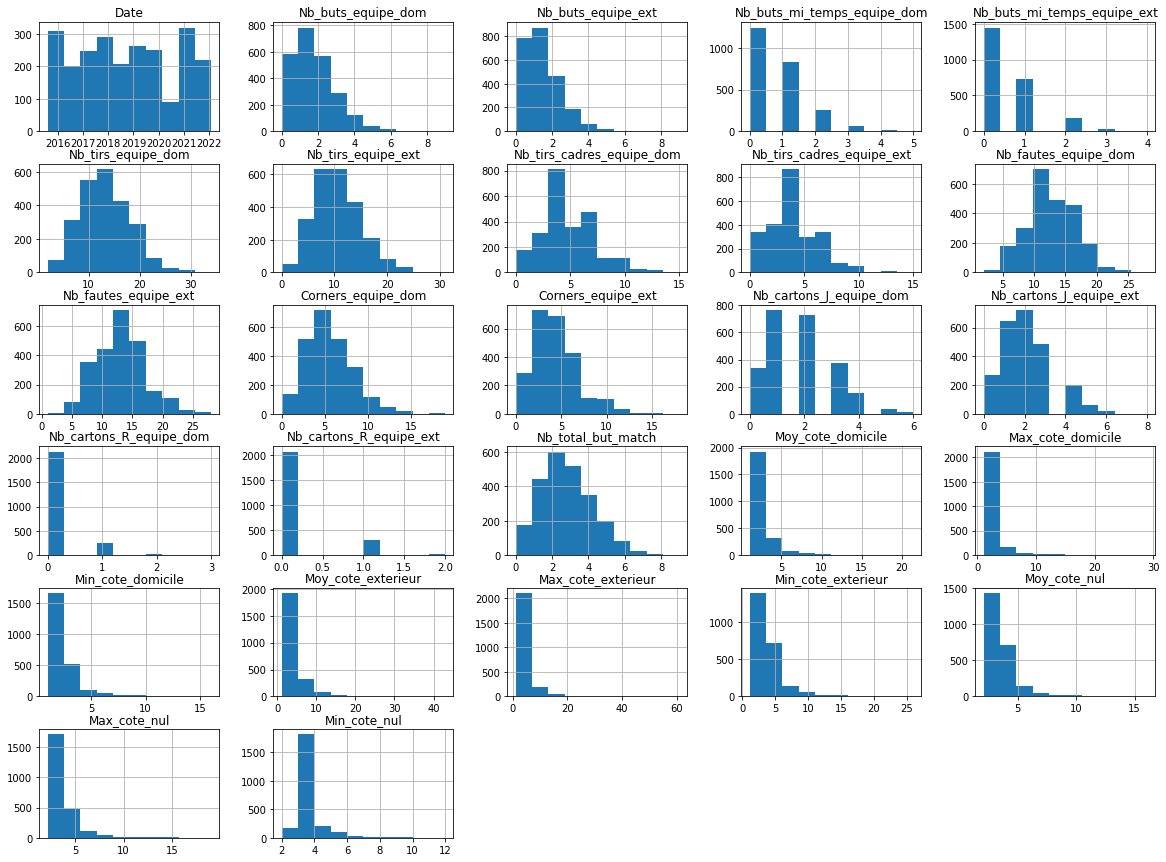

In [ ]:
# Variables quantitatives en diagramme en barres
df.hist(bins=10,figsize=(20,15));

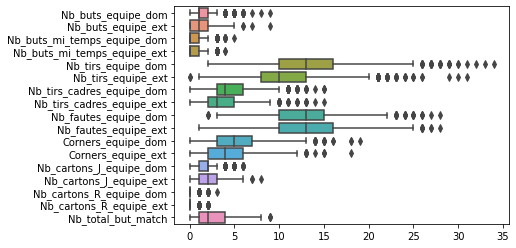

In [ ]:
# Boîtes à moustaches des variables quantitatives
df_hs_cote = df[['Nb_buts_equipe_dom','Nb_buts_equipe_ext','Resultat_match','Nb_buts_mi_temps_equipe_dom',
'Nb_buts_mi_temps_equipe_ext','Resultat_mi_temps','Nb_tirs_equipe_dom','Nb_tirs_equipe_ext','Nb_tirs_cadres_equipe_dom','Nb_tirs_cadres_equipe_ext',
'Nb_fautes_equipe_dom','Nb_fautes_equipe_ext','Corners_equipe_dom','Corners_equipe_ext','Nb_cartons_J_equipe_dom','Nb_cartons_J_equipe_ext',
'Nb_cartons_R_equipe_dom','Nb_cartons_R_equipe_ext','Nb_total_but_match']]
sns.boxplot(data =df_hs_cote,orient="h");

Certaines variables ont des outliers au sens statistique mais ce ne sont pas des données erronées. 
Nous n'allons pas pour l'instant modifier les valeurs ; nous le ferons si besoin au cours de la modélisation (regroupement des valeurs extrèmes ou borne supérieure sur ces valeurs...)

Statistiques descritives des données hors côtes

In [ ]:
df_hs_cote.describe()

,Nb_buts_equipe_dom,Nb_buts_equipe_ext,Nb_buts_mi_temps_equipe_dom,Nb_buts_mi_temps_equipe_ext,Nb_tirs_equipe_dom,Nb_tirs_equipe_ext,Nb_tirs_cadres_equipe_dom,Nb_tirs_cadres_equipe_ext,Nb_fautes_equipe_dom,Nb_fautes_equipe_ext,Corners_equipe_dom,Corners_equipe_ext,Nb_cartons_J_equipe_dom,Nb_cartons_J_equipe_ext,Nb_cartons_R_equipe_dom,Nb_cartons_R_equipe_ext,Nb_total_but_match
count,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000
mean,1.486656,1.149291,0.647623,0.501251,13.207673,10.809842,4.562552,3.764804,12.678899,13.021685,5.355713,4.298165,1.739366,1.987490,0.116764,0.147206,2.635947
std,1.281275,1.121816,0.803944,0.702667,4.776113,4.322487,2.419683,2.208127,3.789890,3.946179,2.794414,2.548635,1.192401,1.276145,0.345002,0.378300,1.599591
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,10.000000,10.000000,3.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,4.000000,3.000000,13.000000,13.000000,5.000000,4.000000,2.000000,2.000000,0.000000,0.000000,2.000000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,13.000000,6.000000,5.000000,15.000000,16.000000,7.000000,6.000000,2.000000,3.000000,0.000000,0.000000,4.000000
max,9.000000,9.000000,5.000000,4.000000,34.000000,31.000000,15.000000,15.000000,28.000000,28.000000,19.000000,18.000000,6.000000,8.000000,3.000000,2.000000,9.000000


Le nombre de cartons jaunes maximum à l'extérieur est de 8 ce qui peut paraitre une erreur. Nous allons regarder en détail le match correspondant.

In [ ]:
df[df['Nb_cartons_J_equipe_ext']==8]

,Date,Saison,Equipe_domicile,Equipe_exterieur,Nb_buts_equipe_dom,Nb_buts_equipe_ext,Resultat_match,Nb_buts_mi_temps_equipe_dom,Nb_buts_mi_temps_equipe_ext,Resultat_mi_temps,Nb_tirs_equipe_dom,Nb_tirs_equipe_ext,Nb_tirs_cadres_equipe_dom,Nb_tirs_cadres_equipe_ext,Nb_fautes_equipe_dom,Nb_fautes_equipe_ext,Corners_equipe_dom,Corners_equipe_ext,Nb_cartons_J_equipe_dom,Nb_cartons_J_equipe_ext,Nb_cartons_R_equipe_dom,Nb_cartons_R_equipe_ext,Nb_total_but_match,Moy_cote_domicile,Max_cote_domicile,Min_cote_domicile,Moy_cote_exterieur,Max_cote_exterieur,Min_cote_exterieur,Moy_cote_nul,Max_cote_nul,Min_cote_nul
1825,2020-09-13,2020,Paris SG,Marseille,0,1,A,0,1,A,14,5,4,2,17,19,4,2,6,8,3,2,1,1.64,1.73,1.5,4.64,5.5,4.1,4.47,5.0,4.0


C'est un match PSG Marseille, pour lequel il y a bien eu 6 cartons jaunes et 2 rouges, les rouges provenant de 2 cartons jaunes pour les mêmes joueurs. Dans notre base de données, les cartons jaunes sont tous comptés, même ceux amenant à un carton rouge. C'est sur ce match que nous pouvons retrouver aussi le maximum de carton jaune pour une équipe à domicile (6) et le maximum de cartons rouges (3). Ce match est un outlier à lui tout seul.

Etude des statistiques de côtes

,Moy_cote_domicile,Max_cote_domicile,Min_cote_domicile,Moy_cote_exterieur,Max_cote_exterieur,Min_cote_exterieur,Moy_cote_nul,Max_cote_nul,Min_cote_nul
count,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000
mean,2.669291,2.801439,2.530859,4.430796,4.845609,4.007519,3.796301,3.991126,3.583407
std,1.823987,2.099631,1.556446,3.710571,4.803641,2.825078,1.231445,1.442387,0.984074
min,1.040000,1.050000,1.030000,1.120000,1.140000,1.100000,2.100000,2.200000,2.000000
25%,1.780000,1.830000,1.750000,2.620000,2.710000,2.500000,3.190000,3.300000,3.100000
50%,2.210000,2.270000,2.150000,3.480000,3.675000,3.300000,3.380000,3.505000,3.250000
75%,2.820000,2.917500,2.700000,4.817500,5.110000,4.400000,3.810000,4.000000,3.600000
max,21.430000,29.000000,16.000000,43.000000,61.000000,26.000000,16.080000,19.000000,12.000000


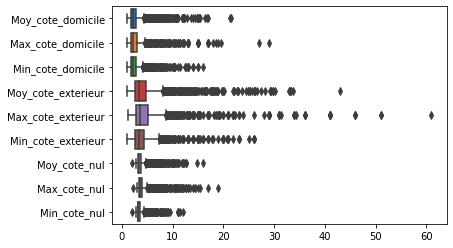

In [ ]:
df_cote = df[['Moy_cote_domicile','Max_cote_domicile','Min_cote_domicile','Moy_cote_exterieur','Max_cote_exterieur','Min_cote_exterieur','Moy_cote_nul','Max_cote_nul','Min_cote_nul']]
display(df_cote.describe())
sns.boxplot(data =df_cote,orient="h");

Certaines côtes sont très élevées. 61 en maximum de côte à l'extérieur.

In [ ]:
df[df['Max_cote_exterieur']==61]

,Date,Saison,Equipe_domicile,Equipe_exterieur,Nb_buts_equipe_dom,Nb_buts_equipe_ext,Resultat_match,Nb_buts_mi_temps_equipe_dom,Nb_buts_mi_temps_equipe_ext,Resultat_mi_temps,Nb_tirs_equipe_dom,Nb_tirs_equipe_ext,Nb_tirs_cadres_equipe_dom,Nb_tirs_cadres_equipe_ext,Nb_fautes_equipe_dom,Nb_fautes_equipe_ext,Corners_equipe_dom,Corners_equipe_ext,Nb_cartons_J_equipe_dom,Nb_cartons_J_equipe_ext,Nb_cartons_R_equipe_dom,Nb_cartons_R_equipe_ext,Nb_total_but_match,Moy_cote_domicile,Max_cote_domicile,Min_cote_domicile,Moy_cote_exterieur,Max_cote_exterieur,Min_cote_exterieur,Moy_cote_nul,Max_cote_nul,Min_cote_nul
908,2017-11-29,2017,Paris SG,Troyes,2,0,H,0,0,D,19,6,6,3,14,16,11,1,0,1,0,0,2,1.04,1.05,1.04,43.0,61.0,25.0,16.08,19.0,11.0


Cela correspond à un match PSG Troyes de la saison 2017. Le PSG était premier et Troyes 13ème avec 23 points de moins. Le PSG a gagné ce match 2/0 mais cette côte parait très elevée par rapport à ce que nous pouvons voir ailleurs.

In [ ]:
# Export du csv dans google colab
df.to_csv('//content/df.csv')